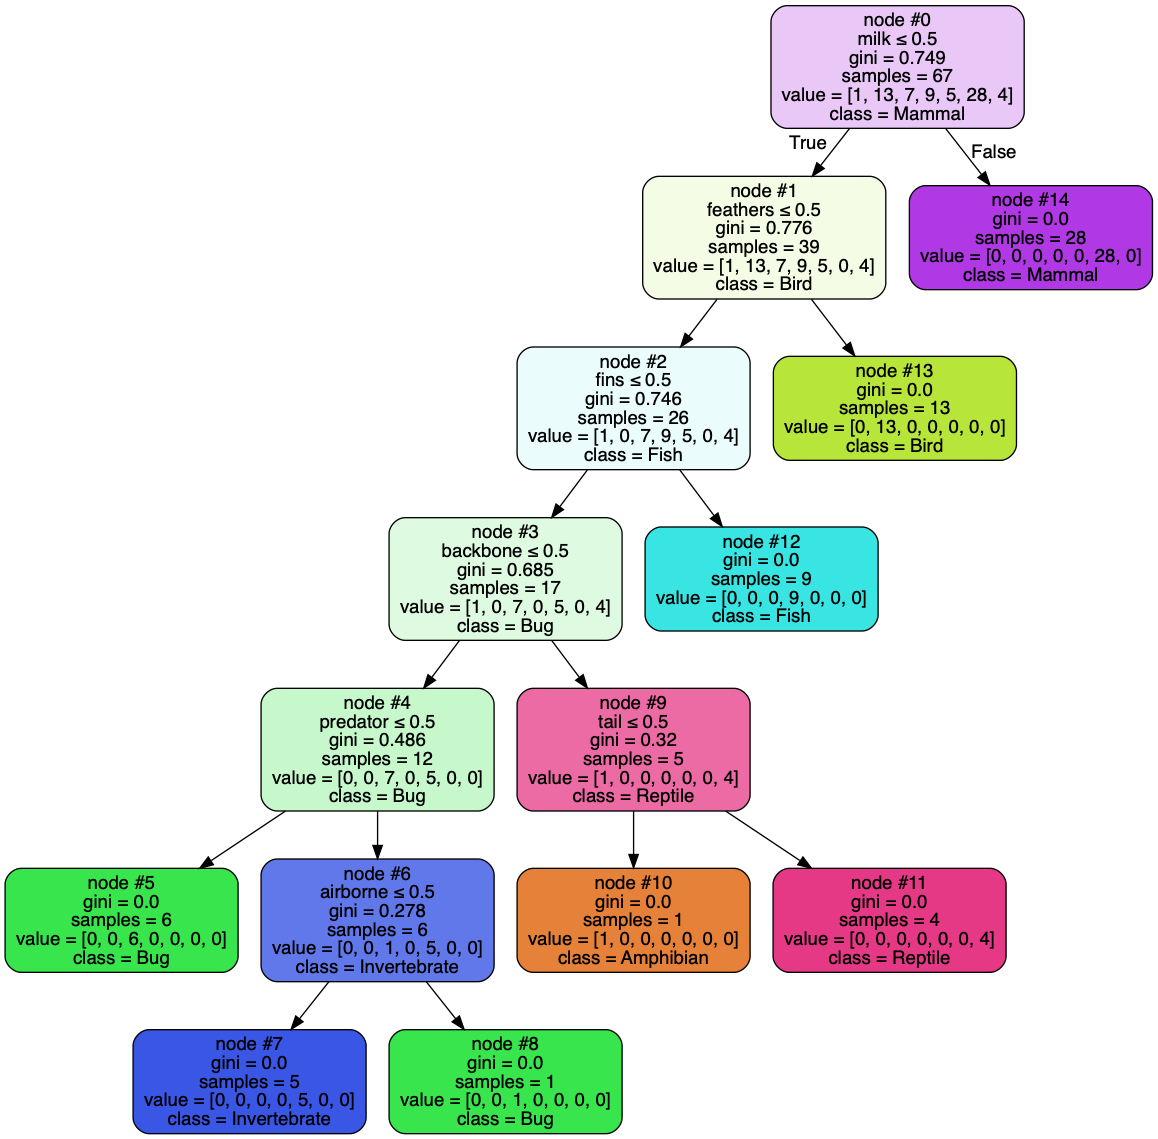

In [15]:
# coding: utf-8

import re

import numpy as np
import pandas as pd
import pydotplus
import seaborn as sns;
from IPython.display import Image
from matplotlib import pyplot as plt
from sklearn.externals.six import StringIO
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz


def make_attribute_plots(gini_split_df, filename):
    oFig1 = plt.figure(1, figsize=(20, 80))
    #     filename = 'node0'

    plot_index = 1
    for index, row in gini_split_df.iterrows():
        print(row['column_name'], row['gini_split'])
        new = oFig1.add_subplot(20, 2, plot_index)
        temp_class_name = row['column_name']
        print(temp_class_name)
        unique_col_value = row['column_value']
        gini_score = row['gini_score']
        gini_split = row['gini_split']
        values = row['distribution']
        new.bar(class_names, values)
        new.set_title(temp_class_name + " is " + str(
            unique_col_value) + ", gini: " + f'{gini_score:.2f}' + ", gini split: " + f'{gini_split:.2f}', fontsize=20)
        plot_index += 1

    oFig1.savefig("../../d3/static_tree/python_plots/" + filename, pad_inches=0.4, bbox_inches="tight")
    plt.show()

def make_gini_df(df_class):
    gini_df = pd.DataFrame()
    # oFig1 = plt.figure(1, figsize=(20, 80))
    # (m,n,x) -> x starts with 1
    ...
    # iterating through every column in datafarme
    plot_index = 1

    for temp_class_name in df_class.columns:
        unique_col_values = list(df_class[temp_class_name].unique())
        unique_col_values.sort()

        if unique_col_values == [0, 1]:
            # for a given column; plot distribution for every possible value

            gini_split = 0
            num_at_record = df_class.shape[0]
            for i in range(0, len(unique_col_values)):
                unique_col_value = unique_col_values[i]
                temp_df = df_class[df_class[temp_class_name] == unique_col_value]
                values = []
                gini_score = 1.0
                num_at_child = float(temp_df.shape[0])
                for class_name in class_names:
                    count = temp_df[temp_df['class_name'] == class_name].shape[0]
                    gini_score -= (float(count) / num_at_child) ** 2
                    values.append(count)

                gini_split += gini_score * (num_at_child / num_at_record)
                plot_index += 1
                temp_row = {'column_name': temp_class_name, 'column_value': unique_col_value, 'gini_score': gini_score,
                            'num_at_child': num_at_child, 'num_at_record': num_at_record, 'distribution': values}
                gini_df = gini_df.append(temp_row, ignore_index=True)
    plt.show()

    return gini_df

def make_gini_split_df(gini_df):

    num_at_record = df_class.shape[0]

    # create gini split df
    gini_df['proportion'] = gini_df['num_at_child'] * gini_df['gini_score']
    gini_splits = gini_df.groupby('column_name')['proportion'].sum() / num_at_record
    gini_split_df = gini_splits.reset_index().sort_values('proportion').rename(index=str,
                                                                               columns={'proportion': 'gini_split'})

    gini_split_df = gini_split_df[['column_name', 'gini_split']]
    gini_split_df = gini_df.merge(gini_split_df, on='column_name').sort_values(['gini_split', 'column_value'])
    return gini_split_df

def make_tornado_subplot(subset, oFig1, plot_index, temp_class_name):
    row0 = subset.iloc[0]
    row1 = subset.iloc[1]
    row = row0

    lows_list = [-x for x in row0['distribution']]
    values_list = row1['distribution']
    variables = ['Amphibian', 'Bird', 'Bug', 'Fish', 'Invertebrate', 'Mammal', 'Reptile'][::-1]

    base = 0

    lows = np.array(
        lows_list
    )

    values = np.array(
        values_list
    )

    ###############################################################################
    # The actual drawing part

    # The y position for each variable
    ys = range(len(values))[::-1]  # top to bottom

    # colors = 'red orange yellow green blue purple brown'.split()
    colors = ['#db5f57', '#dbd057', '#75db57', '#57dbaa', '#579bdb', '#8557db', '#db57c0']
    # Plot the bars, one by one
    plt = oFig1.add_subplot(20, 1, plot_index)
    for y, low, value, color in zip(ys, lows, values, colors):
        # The width of the 'low' and 'high' pieces
        low_width = base - low
        high_width = value

        # Each bar is a "broken" horizontal bar chart

        plt.broken_barh(
            [(low, low_width), (base, high_width)],
            (y - 0.4, 0.8),
            facecolors=[color, color],  # Try different colors if you like
            edgecolors=['black', 'black'],
            linewidth=1,
        )

        # Display the value as text. It should be positioned in the center of
        # the 'high' bar, except if there isn't any room there, then it should be
        # next to bar instead.
        x = base + high_width / 2
        if x <= base + 50:
            x = base + high_width + 50
        plt.text(50, y, variables[y], va='center', ha='center', fontsize=20)

    # Draw a vertical line down the middle
    plt.axvline(base, color='black')

    # Position the x-axis on the top, hide all the other spines (=axis lines)

    axes = plt
    plt.spines['left'].set_visible(False)
    axes.spines['right'].set_visible(False)
    axes.spines['bottom'].set_visible(False)
    axes.xaxis.set_ticks_position('top')

    # Make the y-axis display the variables
    #     plt.yticks(ys, variables)

    # Set the portion of the x- and y-axes to show
    plt.set_xlim(base - 50, base + 50)
    plt.set_ylim(-1, len(variables))

    plt.set_title("plot number" + str(plot_index))
    #     plt.show()
    # plt.set_yticks(ys, variables, fontsize=20)

    gini_split = row['gini_split']
    values = row['distribution']

    new =plt
    # new.bar(class_names, values)
    new.set_title(temp_class_name + " is "  +  "gini split: " + f'{gini_split:.2f}', fontsize=20)
    return "hi"

def make_tornado_plot(gini_split_df, filename):
    # filename = 'tornado'
    oFig1 = plt.figure(1, figsize=(20, 200))
    index = 1
    for x in gini_split_df['column_name'].unique():
        print(x)
        subset = gini_split_df[gini_split_df['column_name'] == x]
        make_tornado_subplot(subset, oFig1, index, x)
        index += 1
    oFig1.savefig("../../d3/static_tree/python_plots/" + filename + '.png', pad_inches=0.4, bbox_inches="tight")
    plt.show()

def get_node_string(orig):
    print(orig)

    # parse and retrieve value
    node_name = re.search('^\d+', orig).group(0)
    samples = re.search('samples = (\d+)', orig).group(1)
    print(samples)
    gini = re.search('gini = (\d+.\d+)', orig).group(1)
    class_name = re.search('class = (\w+)', orig).group(1)
    color = re.search('fillcolor=(.+")', orig).group(1)
    value = re.search('value = (.+]),', orig).group(1)
    new_value = value.replace('[', '').replace(']', '').split(",")

    # make figure:
    fig, (ax1, ax2) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [1, 3]}, figsize=(4, 2))

    # gini plot
    ax1.set_title('gini')
    ax1.bar(0, float(gini), color='darkred')
    ax1.get_xaxis().set_visible(False)

    # class distribution plot
    ax2.set_title('class distribution')
    plot_class_names = list(class_only['class_name'])
    _X = np.arange(len(plot_class_names))
    print(new_value)
    new_new_value = [int(x) for x in new_value]
    ax2.bar(plot_class_names, new_new_value, color=sns.color_palette("Paired")[0:8])
    ax2.set_ylim(0, 45)

    plt.setp(ax2.xaxis.get_majorticklabels(), rotation=90)

    plot_name = 'plots/' + 'gini' + str(node_name) + '.png'
    plt.show()

    temp_row = {'current_node': node_name, 'gini': gini, 'samples': samples, 'class_name': class_name, 'color': color,
                'value': value, 'plot_name': plot_name}

    # check if gini is in the first result
    s = orig.split(',')
    pattern = 'gini'
    gini_match = re.search(pattern, s[0])

    if gini_match is None:
        attribute = s[0].split("[")[1]
        temp_row['attribute'] = attribute

    return (temp_row, fig)


original_df = pd.read_csv('../../data/zoo-animal-classification/zoo.csv', index_col=False)
class_names_df = pd.read_csv('../../data/zoo-animal-classification/class.csv', index_col=False)
class_only = class_names_df[['Class_Number', 'Class_Type']]
class_only = class_only.rename(columns={'Class_Number': 'class_type', "Class_Type": "class_name"})
df = pd.merge(original_df, class_only, on='class_type', how='outer')
y = df['class_name']

df_class = df.copy()
#
# del df['class_name']
# del df['class_type']
# df_bool = df.copy()

# make train test split
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.33, random_state=1)
X_test_with_animal_name = X_test.copy()

df_class = X_train.copy()
del X_train['animal_name']
del X_test['animal_name']



#delete extra columns with class label
del X_train['class_name']
del X_train['class_type']
del X_test['class_name']
del X_test['class_type']

# train decision tree
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)
accuracy_score(y_test, y_pred)
dot_data = StringIO()
class_names = list(class_only['class_name'].unique())
class_names.sort()


export_graphviz(dtree, out_file='output.dot',
                filled=True, rounded=True,
                special_characters=True, proportion=False, feature_names=X_train.columns, node_ids=True,
                class_names=class_names)


export_graphviz(dtree, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, proportion=False, feature_names=X_train.columns, node_ids=True,
                class_names=class_names)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

milk
eggs
hair
feathers
toothed
breathes
backbone
airborne
fins
catsize
tail
aquatic
venomous
predator
domestic


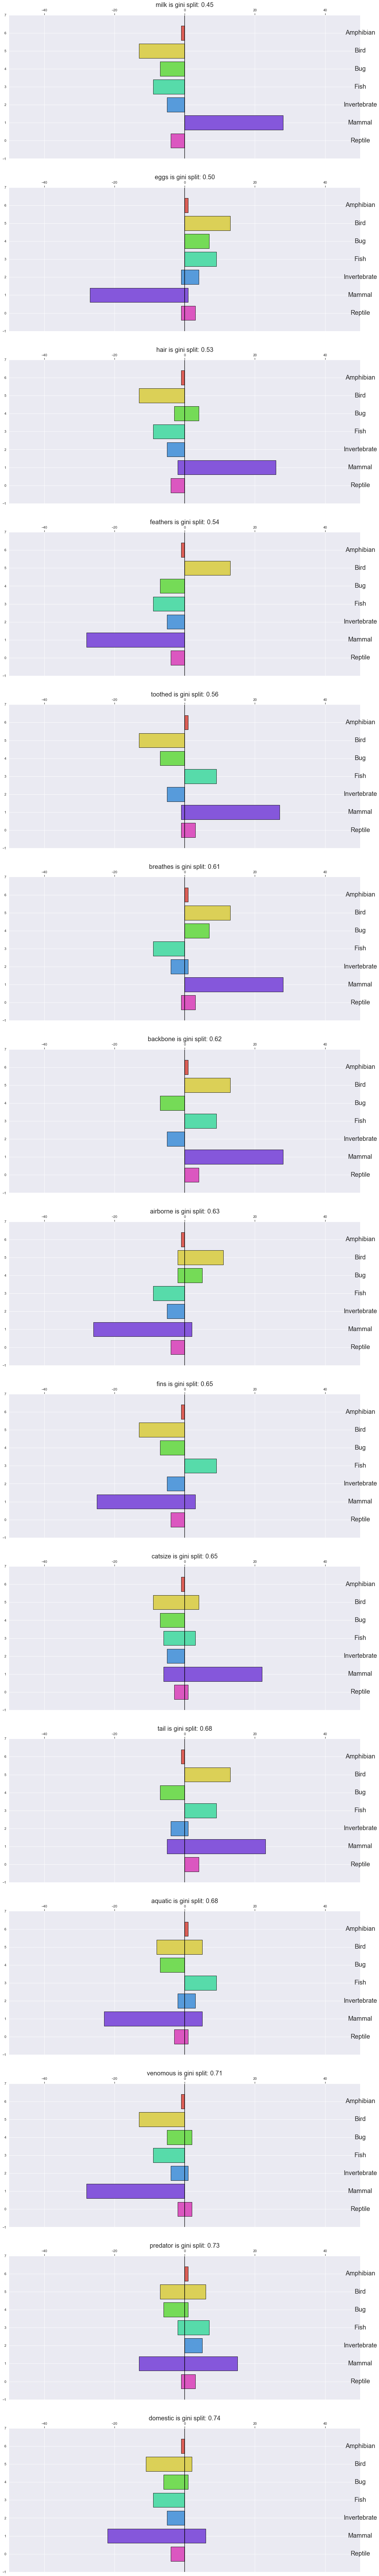

hair
eggs
airborne
aquatic
predator
toothed
fins
tail
domestic
catsize


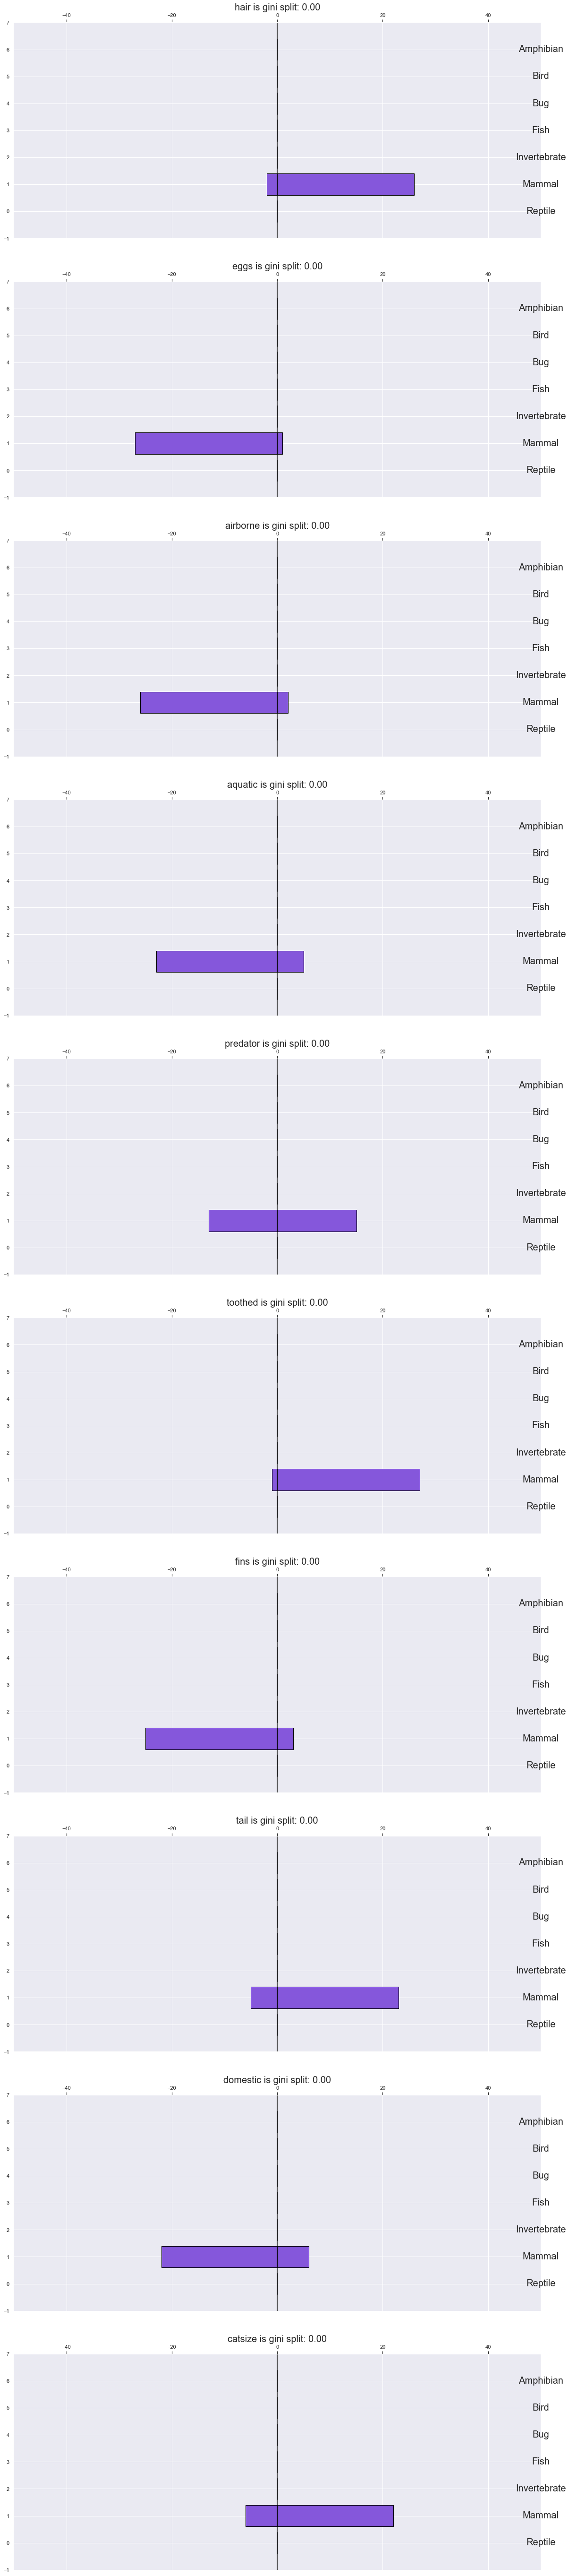

feathers
fins
toothed
breathes
backbone
tail
airborne
hair
aquatic
predator
venomous
eggs
catsize
domestic


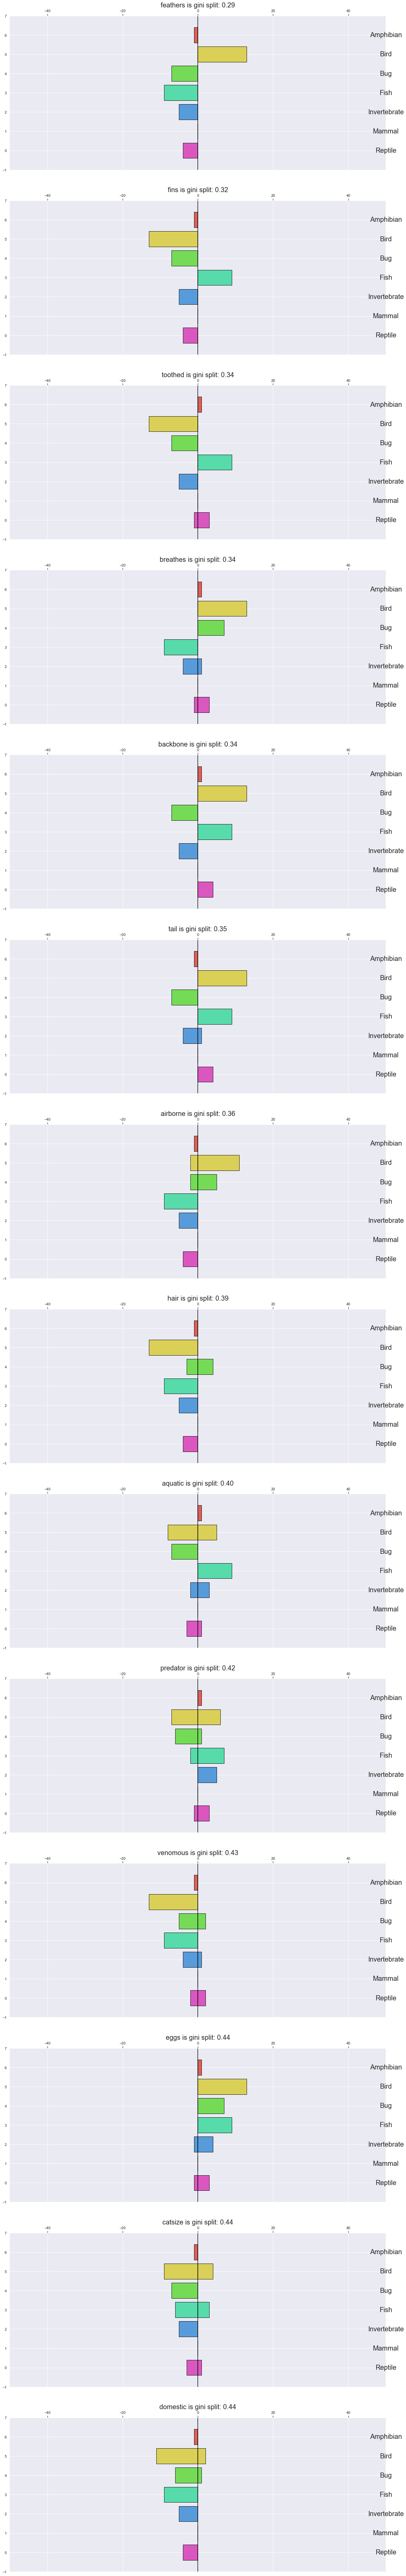

In [11]:
X_test_with_animal_name['y_pred'] = y_pred
X_test_with_animal_name['y_test'] = y_test

class_names = list(class_only['class_name'])
class_names.sort()

del df_class['animal_name']


#making class distribution plots
gini_df = make_gini_df(df_class)
gini_split_df = make_gini_split_df(gini_df)
make_tornado_plot(gini_split_df, 'node0')


df_milk_is_1 = df_class[df_class['milk'] == 1]
gini_df = make_gini_df(df_milk_is_1)
gini_split_df = make_gini_split_df(gini_df)
make_tornado_plot(gini_split_df, 'node18')


df_milk_is_0 = df_class[df_class['milk'] == 0]
gini_df = make_gini_df(df_milk_is_0)
gini_split_df = make_gini_split_df(gini_df)
make_tornado_plot(gini_split_df, 'node1')

In [13]:
dot_string

'digraph Tree {\nnode [shape=box, style="filled, rounded", color="black", fontname=helvetica] ;\nedge [fontname=helvetica] ;\n0 [label=<node &#35;0<br/>milk &le; 0.5<br/>gini = 0.749<br/>samples = 67<br/>value = [1, 13, 7, 9, 5, 28, 4]<br/>class = Mammal>, fillcolor="#b139e547"] ;\n1 [label=<node &#35;1<br/>feathers &le; 0.5<br/>gini = 0.776<br/>samples = 39<br/>value = [1, 13, 7, 9, 5, 0, 4]<br/>class = Bird>, fillcolor="#b7e53922"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label=<node &#35;2<br/>fins &le; 0.5<br/>gini = 0.746<br/>samples = 26<br/>value = [1, 0, 7, 9, 5, 0, 4]<br/>class = Fish>, fillcolor="#39e5e21b"] ;\n1 -> 2 ;\n3 [label=<node &#35;3<br/>backbone &le; 0.5<br/>gini = 0.685<br/>samples = 17<br/>value = [1, 0, 7, 0, 5, 0, 4]<br/>class = Bug>, fillcolor="#39e54d2a"] ;\n2 -> 3 ;\n4 [label=<node &#35;4<br/>predator &le; 0.5<br/>gini = 0.486<br/>samples = 12<br/>value = [0, 0, 7, 0, 5, 0, 0]<br/>class = Bug>, fillcolor="#39e54d49"] ;\n3 -> 4 ;\n5

0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] 
1 -> 2 
2 -> 3 
3 -> 4 
4 -> 5 
4 -> 6 
6 -> 7 
6 -> 8 
3 -> 9 
9 -> 10 
9 -> 11 
2 -> 12 
1 -> 13 
0 -> 14 [labeldistance=2.5, labelangle=-45, headlabel="False"] 
0 [node &#35
0 [node &#35


AttributeError: 'NoneType' object has no attribute 'group'

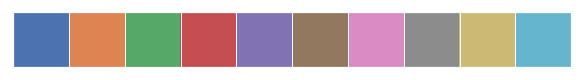

In [17]:
dot_string= dot_data.getvalue()
x = dot_string.replace("&le;", "<=") #.replace("&#35;", "->")
x = x.replace("\n", "")
x = x.replace("<br/>", ",")
x = x.replace("label=<", "")
x = x.split(";")
x = x[2:-1]

import re
edge_list =[]
node_list =[]
element_regex = re.compile(r'.+->.+')
for i in x:
    if element_regex.match(i):
        edge_list.append(i)
    else:
        node_list.append(i)

edge_df = pd.DataFrame(columns=['current_node', 'parent_node'])
for i in range(0, len(edge_list)):
    print(edge_list[i])
    pattern = "(\d+)"
    a = re.findall(pattern, edge_list[i])
    source = a[0]
    destination = a[1]
    edge_df = edge_df.append({'current_node': destination, 'parent_node': source}, ignore_index=True)
edge_df


import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure


x=np.arange(10)
x.shape
np.ones(x.shape)*0.4



import seaborn as sns; sns.set()
sns.palplot(sns.color_palette())
def get_node_string(orig):
    print(orig)
    
    # parse and retrieve value
    node_name = re.search('^\d+', orig).group(0)
    samples = re.search('samples = (\d+)', orig).group(1)
    gini = re.search('gini = (\d+.\d+)', orig).group(1)
    class_name = re.search('class = (\w+)', orig).group(1)
    color = re.search('fillcolor=(.+")', orig).group(1)
    value =  re.search( 'value = (.+]),', orig).group(1)
    new_value = value.replace('[', '').replace(']', '').split(",")
    
    
    #make figure:
    fig, (ax1, ax2) = plt.subplots(1,2, gridspec_kw = {'width_ratios':[1, 3]}, figsize=(4, 2))
    
    #gini plot
    ax1.set_title('gini')
    ax1.bar(0, float(gini), color='darkred')
    ax1.get_xaxis().set_visible(False)
    
    
    #class distribution plot
    ax2.set_title('class distribution')
    plot_class_names = list(class_only['class_name'])
    _X = np.arange(len(plot_class_names))
    print(new_value)
    new_new_value = [int(x) for x in new_value]
    ax2.bar(plot_class_names, new_new_value, color=sns.color_palette("Paired")[0:8])
    ax2.set_ylim(0, 45)

   
    
    plt.setp(ax2.xaxis.get_majorticklabels(), rotation=90)
    
    plot_name = 'plots/'+'gini' + str(node_name) + '.png'
    plt.show()
    
    temp_row = {'current_node': node_name, 'gini': gini, 'samples': samples, 'class_name': class_name, 'color': color, 'value': value, 'plot_name': plot_name}
    
    #check if gini is in the first result
    s = orig.split(',')
    pattern = 'gini'
    gini_match = re.search(pattern, s[0])
    
    if gini_match is None: 
        attribute = s[0].split("[")[1]
        temp_row['attribute']= attribute
   
        
    return (temp_row, fig)



ult_df = pd.DataFrame(columns=['current_node', 'attribute', 'gini', 'samples', 'value', 'class_name', 'color', 'plot_name'])
# ult_df = df_.fillna(0) # with 0s rather than NaNs
ult_df

node_list

ult_list = {}
for i in range(0, len(node_list)):
    print(node_list[i])
    (node_string, fig) = get_node_string(node_list[i])
    ult_df = ult_df.append(node_string, ignore_index=True)
    fig.savefig('../treant-js/examples/decision-tree/' + node_string['plot_name'], pad_inches=0.4, bbox_inches="tight")

ult_df

new_df = ult_df.merge(edge_df, on='current_node', how='outer')
new_df
# new_df.fillna(0)

make_attribute_view(df_class, 'node0')

make_attribute_view(df_class[df_class['milk'] > 0.5], 'node18')

make_attribute_view(df_class[df_class['milk'] <= 0.5], 'node1')

full_string = ""
for index, row in new_df.iterrows():
    node_name = row['current_node']
    attribute = row['attribute']
    plot_name = row['plot_name']
    samples = row['samples']
    class_name = row['class_name']
    value = row['value']
    gini = row['gini']
    if node_name=='0':
        result = 'node'+ str(node_name) + ' = {'\
        + 'text: { gini: "gini:' + gini \
        + '", samples: "samples: ' + samples \
        + '", attribute: "attribute: ' + str(attribute) \
        + '", class_name: "class_name: ' + class_name \
        + '", value: "value: ' + value \
        + '"},'\
        + 'connectors: {type: "curve", style: {"stroke-width": ' + str(int(samples)/5) + '}},' \
        + 'image:"' + plot_name + '"},'
    else:
        parent = row['parent_node']
        result = 'node'+ str(node_name) + ' = {' + "parent: node" + str(parent) \
        + ', text: {' \
        + 'gini: "gini: ' + gini \
        + '", samples: "samples: ' + samples \
        + '", attribute: "attribute: ' + str(attribute) \
        + '", class_name: "class_name: ' + class_name \
        + '", value: "value: ' + value \
        + '"},'\
        + 'connectors: {type: "curve", style: {"stroke-width": ' + str(int(samples)/5) + '}},' \
        + 'image:"' + plot_name + '"},' 
        
        
#     print(result)
    full_string+=result
    
    
#         + 'connectors: {type: "step", style: {"stroke-width": 2}},' \


first_part = 'var config = {container: "#basic-example", levelSeparation: 200, connectors: {type: "curve", style: { "stroke-width": 5}}, node: { HTMLclass: "nodeExample1"}}, '
last_part = "chart_config = [config," + ','.join(['node' + str(x) for x in list(new_df['current_node'].keys())])+'];'
whole_string = first_part + full_string + last_part
text_file = open("../treant-js/examples/decision-tree/basic-example.js", "w")
text_file.write(whole_string)
text_file.close()

whole_string



